# Used Cars Dataset Loading and Inspection

In this notebook, we import the German Used Cars dataset (in its translated version) and perform some initial checks to ensure it is ready for the next step, namely EDA.

## Project Goal
Let us imagine a scenario for this project. Our company wants to deploy a website allowing car owners to get a valuation for their cars, in order to help them decide what price to ask for. The users would enter some information about the car, and the model would return a suggested value.

Therefore, the target variable is `price`, and the other features are independent predictors. We are in the setting of a regression task: We are trying to predict a numerical value rather than a category. Note that if we were returning the suggested price as an interval (0-5000, 5000-10,000, 10,000-20,000, etc.), then this could be framed as a classification task and it would probably be easier because the prediction would not need to be as accurate.


## Data Processing

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

Let's first take a look a the data without importing it. Remember that Linux terminal commands are accessible in a Jupyter Notebook by using `!`.

In [ ]:
!head -n 10 data/autos_eng.csv

We see that a mixture of datetime variables (`dateCrawled`, `dateCreated`, `lastSeen`), categorical variables (`seller`, `brand`, `model`, etc.), numerical variables (`price`, `yearOfRegistration`, `kilometer`, etc.), and what seems to be a free text variable (`name`). The variable `postalCode` looks numeric, but in some countries postal codes can have letters, plus they don't really represent something that is quantified numerically. Therefore, it is probably best imported as strings.  
We don't really have any field that would make a useful row Index, so we just let Pandas assign the default values.

The variable `price` will be contain our labels, i.e. the values we will try to predict when in the modelling phase.

In [3]:
cars = pd.read_table(
    'data/autos_eng.csv', 
    sep=',', 
    parse_dates=[0, 16, 19],
    dtype={
        'seller': 'category', 
        'offerType': 'category',
        'abtest': 'category' , 
        'vehicleType': 'category',
        'monthOfRegistration': 'category',
        'gearbox': 'category',
        'model': 'category',
        'fuelType': 'category',
        'brand': 'category',
        'notRepairedDamage': 'category',
        'postalCode': 'str'
    }
)

In [4]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,selling,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,selling,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,selling,9800,test,SUV,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,selling,1500,test,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,selling,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


In [5]:
cars.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,private,selling,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,other,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,private,selling,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,selling,9200,test,people carrier,1996,manual,102,transporter,150000,3,diesel,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,private,selling,3400,test,estate,2002,manual,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,private,selling,28990,control,sedan,2013,manual,320,m_reihe,50000,8,petrol,bmw,no,2016-03-07,0,73326,2016-03-22 03:17:10


Let's make sure that all columns have been imported in the correct data type:

In [6]:
cars.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                       category
offerType                    category
price                           int64
abtest                       category
vehicleType                  category
yearOfRegistration              int64
gearbox                      category
powerPS                         int64
model                        category
kilometer                       int64
monthOfRegistration          category
fuelType                     category
brand                        category
notRepairedDamage            category
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                     object
lastSeen               datetime64[ns]
dtype: object

The variables that we had identified as numerical as all encoded as such, which means there are no character strings in them. One less thing to worry about.

In [7]:
cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
cars.shape

(371528, 20)

This is a fairly large dataset as far as small-scale Data Science projects go. This means we have plenty of data to train our models on, but also a lot more potential for noisy observations.

First, let's see if any rows are duplicated:

In [8]:
cars.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
371523    False
371524    False
371525    False
371526    False
371527    False
Length: 371528, dtype: bool

In [9]:
cars[cars.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,private,selling,1799,test,coupe,1999,automatic,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,private,selling,1000,control,small car,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,private,selling,4699,test,coupe,2003,automatic,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,private,selling,1999,control,estate,2001,manual,131,passat,150000,7,diesel,volkswagen,no,2016-03-18,0,36391,2016-03-18 18:46:15


There are only 4 duplicates. Let's remove them:

In [10]:
cars.drop_duplicates(inplace=True)
cars.shape

(371524, 20)

In [11]:
cars.select_dtypes(['object', 'category']).nunique()

name                   233531
seller                      2
offerType                   2
abtest                      2
vehicleType                 8
gearbox                     2
model                     251
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
postalCode               8150
dtype: int64

As expected, `name` has a very large number of distinct values because it is free text. For this variable to be useful, we would need to do some serious engineering to extract meaningful information, possibly even delving into Natural Language Processing, i.e. the science of making a machine "understand" human languages. This is outside the scope of this course so let's just drop this column.

In [12]:
del cars['name']

`postalCode` also has many unique values, so it was probably a good thing to import it as string rather than categorical. We will see later what to do with it, when we move on to the modelling part of this project.

For now, let's check the unique values of our categorical variables:

In [13]:
for c in cars.select_dtypes(['category']).columns:
    print(cars[c].unique())
    print(cars[c].value_counts(), '\n')

['private', 'commercial']
Categories (2, object): ['private', 'commercial']
seller
private       371521
commercial         3
Name: count, dtype: int64 

['selling', 'buying']
Categories (2, object): ['buying', 'selling']
offerType
selling    371512
buying         12
Name: count, dtype: int64 

['test', 'control']
Categories (2, object): ['control', 'test']
abtest
test       192583
control    178941
Name: count, dtype: int64 

[NaN, 'coupe', 'SUV', 'small car', 'sedan', 'convertible', 'people carrier', 'estate', 'other']
Categories (8, object): ['SUV', 'convertible', 'coupe', 'estate', 'other', 'people carrier', 'sedan', 'small car']
vehicleType
sedan             95894
small car         80022
estate            67563
people carrier    30201
convertible       22898
coupe             19013
SUV               14707
other              3357
Name: count, dtype: int64 

['manual', 'automatic', NaN]
Categories (2, object): ['automatic', 'manual']
gearbox
manual       274212
automatic     77103
Na

`seller` and `offerType` both have two categories, of which one is overwhelmingly dominant (only 3 and 12 examples of the minority label, respectively). We can choose to ignore them, or to remove these minority labels entirely, which will not remove much data and might remove some noise, because it is fair to assume that a professional seller, or someone looking to buy rather than to sell, will offer a price that is outside of the main price distribution. The impact is likely to be minimal in either case, but removing them allows us to remove these two columns. Less columns is usually helpful as it helps models avoid overfitting and train faster.

In [14]:
cars = cars.loc[(cars.seller=='private') & (cars.offerType=='selling')]

In [15]:
del cars['seller']
del cars['offerType']
cars.shape

(371509, 17)

We also notice a column called `abtest`. This is internal to eBay, and is an indicator used to direct sellers to one or the other versions of their website without them noticing, then to compare their behaviours to see if they are different. This is completely unrelated to our task here, so we can also remove this column, thus further reducing the dataset.

In [16]:
del cars['abtest']

Now, let's look for missing data.

In [17]:
cars.isnull().sum() / len(cars)

dateCrawled            0.000000
price                  0.000000
vehicleType            0.101914
yearOfRegistration     0.000000
gearbox                0.054381
powerPS                0.000000
model                  0.055129
kilometer              0.000000
monthOfRegistration    0.000000
fuelType               0.089847
brand                  0.000000
notRepairedDamage      0.193947
dateCreated            0.000000
nrOfPictures           0.000000
postalCode             0.000000
lastSeen               0.000000
dtype: float64

Several columns contain missing values, sometimes in high proportion (e.g. `notRepairedDamage`, almost 20%). What is surprising is that some fields such as `model` have missing values. eBay does not seem to make them mandatory, which contributes to adding noise to the data, besides probably making these ads very ineffective. We will have to think of a strategy to deal with these NaNs before building a model.

We can also check for rows with lots of missing values:

In [18]:
 cars.isnull().sum(axis=1).sort_values(ascending=False)

252504    5
118047    5
312893    5
24819     5
246394    5
         ..
189355    0
189356    0
189357    0
189358    0
371527    0
Length: 371509, dtype: int64

So far, we've only looked as "official" missing values. However, when we looked at the value counts for categorical variables, we noticed that `monthOfRegistration` had around 37,000 zeros and no NaNs. In actual terms, this is probably because users are not mandated to enter the registration month, so 0 means NaN. Let's make this explicit: 

In [21]:
cars.monthOfRegistration[cars.monthOfRegistration == '0'] = np.nan
# Remove the category '0' from our categorical variable, since its count is zero:
cars['monthOfRegistration'] = cars.monthOfRegistration.cat.remove_unused_categories()

In [22]:
cars.monthOfRegistration.value_counts()

monthOfRegistration
3     36168
6     33165
4     30918
5     30631
7     28956
10    27336
11    25489
12    25379
9     25074
1     24558
8     23763
2     22402
Name: count, dtype: int64

Are there any other instances of incorrect NaN encoding among the numerical variables? We know there are no strings such as "#NA", "NULL", "N/A" etc. because these would have caused the columns to be imported as `object` data types. But there might be negative values or zeros in columns where they shouldn't happen. We can check the range (and other statistics) of each numerical variable with a one-liner:

In [23]:
cars.describe()  

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,dateCreated,nrOfPictures,lastSeen
count,371509,3.715090e+05,371509.000000,371509.000000,371509.000000,371509,371509.0,371509
mean,2016-03-21 13:30:33.537021184,1.729586e+04,2004.578309,115.552250,125619.863853,2016-03-20 19:42:53.264174080,0.0,2016-03-30 03:38:02.284631040
min,2016-03-05 14:06:22,0.000000e+00,1000.000000,0.000000,5000.000000,2014-03-10 00:00:00,0.0,2016-03-05 14:15:08
25%,2016-03-13 12:51:45,1.150000e+03,1999.000000,70.000000,125000.000000,2016-03-13 00:00:00,0.0,2016-03-23 11:37:23
50%,2016-03-21 18:36:22,2.950000e+03,2003.000000,105.000000,150000.000000,2016-03-21 00:00:00,0.0,2016-04-03 23:17:22
75%,2016-03-29 14:49:40,7.200000e+03,2008.000000,150.000000,150000.000000,2016-03-29 00:00:00,0.0,2016-04-06 10:45:02
max,2016-04-07 14:36:58,2.147484e+09,9999.000000,20000.000000,150000.000000,2016-04-07 00:00:00,0.0,2016-04-07 14:58:51
std,NaN,3.588045e+06,92.868930,192.143444,40110.634643,NaN,0.0,NaN


This does not cover datetime variables, though, so we have to treat them separately:

In [24]:
cars.select_dtypes('datetime').min() 

dateCrawled   2016-03-05 14:06:22
dateCreated   2014-03-10 00:00:00
lastSeen      2016-03-05 14:15:08
dtype: datetime64[ns]

In [25]:
cars.select_dtypes('datetime').max()

dateCrawled   2016-04-07 14:36:58
dateCreated   2016-04-07 00:00:00
lastSeen      2016-04-07 14:58:51
dtype: datetime64[ns]

First, we see that `nrOfPictures` has only zeros, which makes this variable completely useless. We can get rid of it. Compared to when we started, we already reduced the number of columns by 4, or 20%, with almost no loss of actual data.

In [26]:
del cars['nrOfPictures']
cars.shape

(371509, 15)

 `price`, `powerPS`, and `yearOfRegistration` all have strange minimal values (0 for the first two, 1000 for the latter).

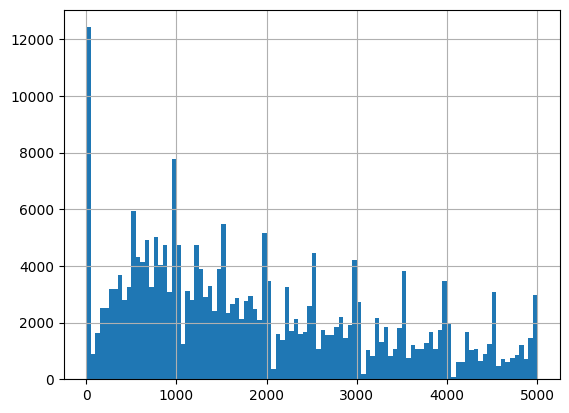

In [27]:
cars.price[cars.price < 5000].hist(bins=100);

In [28]:
len(cars.price[cars.price == 0])

10772

Price = 0 seems to be either a trick to attract customers, or more likely missing inputs (i.e. hidden NaNs). It is surprising again that eBay does not mandate a value here. Let's set these to NaN. Notice also that the price distribution has peaks just under each multiple of €500. This probably corresponds to "psychological" pricepoints (e.g. €9,900). But we are getting ahead of ourselves, we'll notice this again during EDA.

In [30]:
cars.loc[cars.price == 0, 'price'] = np.nan

What about the high end of the spectrum? Prices go all the way up to over €2 billion, which is completely unrealistic. This will warrant a careful outlier analysis during EDA, but they are probably not hidden NaNs so let's leave them aside for now.

Let's move on to `powerPS`.

In [31]:
len(cars.powerPS[cars.powerPS == 0])

40811

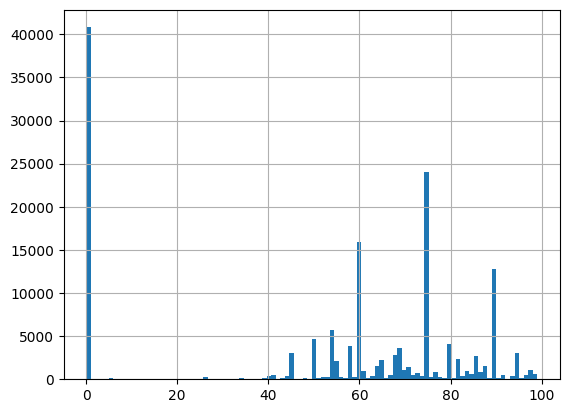

In [32]:
cars.powerPS[cars.powerPS < 100].hist(bins=100);

Again, powerPS = 0 seem to correspond to missing inputs. Let's set them to NaN:

In [33]:
cars.loc[cars.powerPS <= 0, 'powerPS'] = np.nan

Once again, there are also unrealistic values at the top end of the spectrum, but as they are probably input errors rather than missing inputs, we will worry about them later.

As for yearOfRegistration, there are again lots of strange looking values, with registration dates starting from 1000, which would be very surprising from a historical perspective:

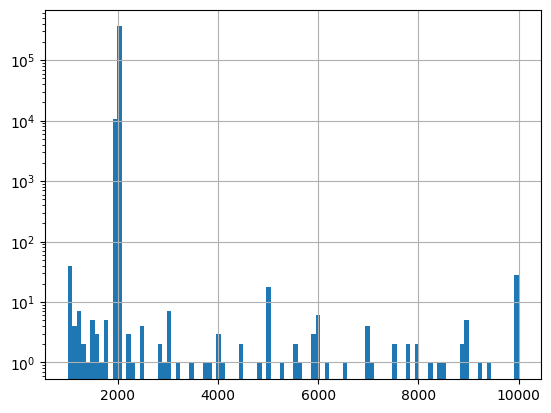

In [34]:
cars.yearOfRegistration.hist(bins=100)
plt.yscale('log');

Let's bin these values into arbitrary bins:

In [35]:
bins = [1000, 1900, 1950, 1960, 2016, 2100, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
quantiles = pd.cut(cars.yearOfRegistration, bins, right=False)
pd.value_counts(quantiles, sort=False)

yearOfRegistration
[1000, 1900)         68
[1900, 1950)        221
[1950, 1960)        251
[1960, 2016)     346431
[2016, 2100)      24425
[2100, 3000)         11
[3000, 4000)         11
[4000, 5000)          7
[5000, 6000)         25
[6000, 7000)          8
[7000, 8000)          9
[8000, 9000)          7
[9000, 10000)        35
Name: count, dtype: int64

In [36]:
(len(cars.yearOfRegistration[cars.yearOfRegistration==2016]),
len(cars.yearOfRegistration[cars.yearOfRegistration==2017]))

(9858, 10546)

Here, it is much less clear what values could be considered as NaNs. There are unrealistic values in every bin, and there is not a peak at 1000 or any other value, 2016 and 2017 excepted. However, some cars will have indeed been registered in 2016, so we cannot simply dismiss it as an NaN representation. As for 2017, it is doubtful that this would be the default value assigned when the user fails to input something.

One way to address this problem is to analyse each of these examples and decide if they should be retained. A faster strategy would be to only retain the portion of the dataset that contains sensible values. We will make this decision during EDA. For now, let's keep everything as is.

In [37]:
cars.describe()

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,dateCreated,lastSeen
count,371509,3.607370e+05,371509.000000,330698.000000,371509.000000,371509,371509
mean,2016-03-21 13:30:33.537021184,1.781233e+04,2004.578309,129.812400,125619.863853,2016-03-20 19:42:53.264174080,2016-03-30 03:38:02.284631040
min,2016-03-05 14:06:22,1.000000e+00,1000.000000,1.000000,5000.000000,2014-03-10 00:00:00,2016-03-05 14:15:08
25%,2016-03-13 12:51:45,1.250000e+03,1999.000000,80.000000,125000.000000,2016-03-13 00:00:00,2016-03-23 11:37:23
50%,2016-03-21 18:36:22,3.000000e+03,2003.000000,116.000000,150000.000000,2016-03-21 00:00:00,2016-04-03 23:17:22
75%,2016-03-29 14:49:40,7.490000e+03,2008.000000,150.000000,150000.000000,2016-03-29 00:00:00,2016-04-06 10:45:02
max,2016-04-07 14:36:58,2.147484e+09,9999.000000,20000.000000,150000.000000,2016-04-07 00:00:00,2016-04-07 14:58:51
std,NaN,3.641222e+06,92.868930,199.058043,40110.634643,NaN,NaN


We can now store this dataset:

In [38]:
cars.to_csv('data/autos_clean.csv', index=False)

Congratulations, you now have a clean-ish dataset that can be further explored and analysed during EDA.